### 1. Carga datos

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\blanc.TORRE-BLANCA\OneDrive\Escriptori\bootcamp-data\ML_Birds_Strikes\src\data_sample\NASDAQ100_Historical_Data.csv")
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2000-01-03,0.94,1.00,0.91,1.00,0.84,535796800
1,AAPL,2000-01-04,0.97,0.99,0.90,0.92,0.77,512377600
2,AAPL,2000-01-05,0.93,0.99,0.92,0.93,0.78,778321600
3,AAPL,2000-01-06,0.95,0.96,0.85,0.85,0.71,767972800
4,AAPL,2000-01-07,0.86,0.90,0.85,0.89,0.75,460734400
...,...,...,...,...,...,...,...,...
514070,ZS,2026-02-11,175.62,175.87,165.36,171.00,171.00,2670100
514071,ZS,2026-02-12,171.99,173.99,163.00,170.90,170.90,2499300
514072,ZS,2026-02-13,174.34,179.90,172.43,177.72,177.72,2434100
514073,ZS,2026-02-17,175.82,176.85,169.61,172.59,172.59,2038100


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,514075.000000,514075.000000,514075.000000,514075.000000,514075.000000,5.140750e+05
mean,100.179428,101.486198,98.834356,100.186068,94.683734,2.596485e+07
std,241.284690,244.184916,238.271945,241.291633,239.893928,1.087908e+08
min,0.030000,0.030000,0.030000,0.030000,0.030000,0.000000e+00
25%,17.990000,18.270000,17.700000,17.990000,13.800000,1.653700e+06
50%,40.770000,41.320000,40.240000,40.800000,32.760000,3.758500e+06
75%,96.820000,98.040000,95.580000,96.850000,89.660000,1.056520e+07
max,5815.000000,5839.410000,5707.930000,5815.920000,5794.840000,9.230856e+09


### 2. Problema de Machine Learning

#### 2.1 Suficiencia de datos
El dataset contiene 510.000 filas y 8 columnas, una cantidad amplia y adecuada para entrenar modelos de Machine Learning sin problemas de escasez de datos.


#### 2.2 Formato y calidad inicial
Los datos vienen en un archivo CSV, un formato manejable y estándar.
Aparece un aviso de pandas indicando que algunas columnas tienen tipos mezclados, pero esto es habitual y puede corregirse durante el preprocesado.


#### 2.3 Relevancia de las variables
El dataset incluye información útil para modelar fenómenos relacionados con impactos de aves, como:
- Date
- Open
- High
- Low
- Close
- Adj. Close
- Volume
Estas variables permiten construir un modelo predictivo con sentido.


#### 2.4 Justificación del uso de Machine Learning
El comportamiento del Nasdaq‑100 es complejo y no lineal, por lo que métodos simples no capturan bien sus patrones. Las variables históricas del precio y del volumen contienen información útil que un modelo puede aprender para anticipar movimientos futuros. El machine learning permite detectar relaciones temporales, tendencias y señales que no son evidentes a simple vista. Además, ofrece métricas objetivas para evaluar la capacidad predictiva del modelo. En conjunto, es una herramienta adecuada para analizar y predecir la evolución del índice.


#### 2.5 Variable objetivo
En el dataset NASDAQ100_Historical_Data.csv, la variable objetivo más adecuada es el precio de cierre del día siguiente (Close en t+1).



### 3. dividir train y test

In [6]:
# Convertir la fecha a formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# Ordenar por fecha (muy importante en series temporales)
df = df.sort_values("Date")

# Definir proporción de entrenamiento
train_size = int(len(df) * 0.8)

# Dividir en train y test respetando el tiempo
train = df.iloc[:train_size]
test = df.iloc[train_size:]

print("Tamaño train:", train.shape)
print("Tamaño test:", test.shape)


Tamaño train: (411260, 8)
Tamaño test: (102815, 8)


### 4. Target

In [7]:
# Crear la variable objetivo: precio de cierre del día siguiente
df["Target"] = df["Close"].shift(-1)

# Eliminar la última fila (no tiene valor futuro)
df = df.dropna(subset=["Target"])


### 5. Comprension de variables

In [8]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 514074 entries, 0 to 470776
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Ticker     514074 non-null  object        
 1   Date       514074 non-null  datetime64[ns]
 2   Open       514074 non-null  float64       
 3   High       514074 non-null  float64       
 4   Low        514074 non-null  float64       
 5   Close      514074 non-null  float64       
 6   Adj Close  514074 non-null  float64       
 7   Volume     514074 non-null  int64         
 8   Target     514074 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 39.2+ MB


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Target
count,514074,514074,514074.000000,514074.000000,514074.000000,514074.000000,514074.000000,5.140740e+05,514074.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2014-06-03 07:40:46.709228800,100.179297,101.486059,98.834228,100.185928,94.683583,2.596489e+07,100.186261
min,NaN,2000-01-03 00:00:00,0.030000,0.030000,0.030000,0.030000,0.030000,0.000000e+00,0.030000
25%,NaN,2008-04-30 00:00:00,17.990000,18.270000,17.700000,17.990000,13.800000,1.653700e+06,17.992500
50%,NaN,2015-01-16 00:00:00,40.770000,41.320000,40.240000,40.800000,32.760000,3.758500e+06,40.800000
75%,NaN,2020-12-07 00:00:00,96.820000,98.040000,95.580000,96.850000,89.660000,1.056520e+07,96.850000
max,NaN,2026-02-18 00:00:00,5815.000000,5839.410000,5707.930000,5815.920000,5794.840000,9.230856e+09,5815.920000


#### 5.1 Variables categóricas
No tiene variables categóricas

#### 5.2 Variables numéricas
El dataset está compuesto principalmente por variables numéricas que describen el comportamiento diario del índice Nasdaq‑100. Estas variables representan información cuantitativa esencial para analizar la evolución del mercado y construir un modelo predictivo:
- Open: precio al inicio de la sesión. Refleja las expectativas iniciales del mercado y sirve como referencia para medir movimientos intradía.
- High: precio máximo alcanzado durante el día. Indica presión compradora y amplitud del movimiento.
- Low: precio mínimo del día. Muestra momentos de venta intensa o correcciones.
- Close: precio de cierre, considerado el valor más representativo de la jornada. Suele utilizarse como variable objetivo en modelos de predicción.
- Adj Close: precio ajustado por dividendos y splits. Es útil para análisis a largo plazo, ya que elimina distorsiones.
- Volume: número total de operaciones realizadas. Permite identificar días de alta actividad, cambios de tendencia o confirmación de movimientos.
Estas variables pueden requerir escalado y permiten generar indicadores derivados como retornos, medias móviles o volatilidad.




#### 5.3 Variables temporales
El dataset incluye una variable temporal fundamental:
- Date: fecha de la sesión bursátil. Permite ordenar la serie temporal y extraer características como año, mes, día de la semana o patrones estacionales. Estas transformaciones ayudan a capturar tendencias y ciclos del mercado.


#### 5.4 Variables derivadas (a crear)
Aunque el dataset original no incluye variables categóricas o adicionales, es habitual generar nuevas características que mejoran la capacidad predictiva del modelo:
- Retornos diarios: miden la variación porcentual entre días consecutivos.
- Medias móviles: capturan tendencias de corto, medio y largo plazo.
- Volatilidad: refleja la variación del precio en ventanas temporales.
- Lags: valores rezagados de Close, Volume u otras columnas, necesarios para modelos supervisados basados en series temporales.
Estas variables enriquecen el dataset y permiten que el modelo aprenda patrones más complejos del comportamiento del índice.


### 6. Feat. Red. Preliminar

In [12]:
# --- 6. Feat. Red. Preliminar ---

# 1. Revisar NaNs por columna
na_counts = df.isna().sum()
na_percent = (df.isna().mean() * 100).round(2)

print("NaNs por columna:")
display(na_counts)

print("\nPorcentaje de NaNs:")
display(na_percent)

NaNs por columna:


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64


Porcentaje de NaNs:


Ticker       0.0
Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Target       0.0
dtype: float64

este dataset no tiene variables categoricas por lo que no hay cardinalidad alta entre ellas

### 7. Análisis univariante

In [21]:
# Seleccionar solo columnas numéricas para evitar errores en la correlación
df_num = df.select_dtypes(include=["float64", "int64"])
df_num.head()


,Open,High,Low,Close,Adj Close,Volume,Target
0,0.94,1.00,0.91,1.00,0.84,535796800,0.10
356203,0.10,0.10,0.09,0.10,0.09,300912000,0.49
366681,0.47,0.49,0.47,0.49,0.47,88847,4.47
60441,4.07,4.48,3.95,4.47,4.47,322352000,0.72
379740,0.74,0.74,0.67,0.72,0.72,3720000,62.94


In [22]:
# Distribución básica de cada variable numérica
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,514074.0,1.001793e+02,2.412849e+02,0.03,1.799000e+01,40.77,96.82,5.815000e+03
High,514074.0,1.014861e+02,2.441851e+02,0.03,1.827000e+01,41.32,98.04,5.839410e+03
Low,514074.0,9.883423e+01,2.382722e+02,0.03,1.770000e+01,40.24,95.58,5.707930e+03
Close,514074.0,1.001859e+02,2.412918e+02,0.03,1.799000e+01,40.80,96.85,5.815920e+03
Adj Close,514074.0,9.468358e+01,2.398941e+02,0.03,1.380000e+01,32.76,89.66,5.794840e+03
Volume,514074.0,2.596489e+07,1.087909e+08,0.00,1.653700e+06,3758500.00,10565200.00,9.230856e+09
Target,514074.0,1.001863e+02,2.412918e+02,0.03,1.799250e+01,40.80,96.85,5.815920e+03


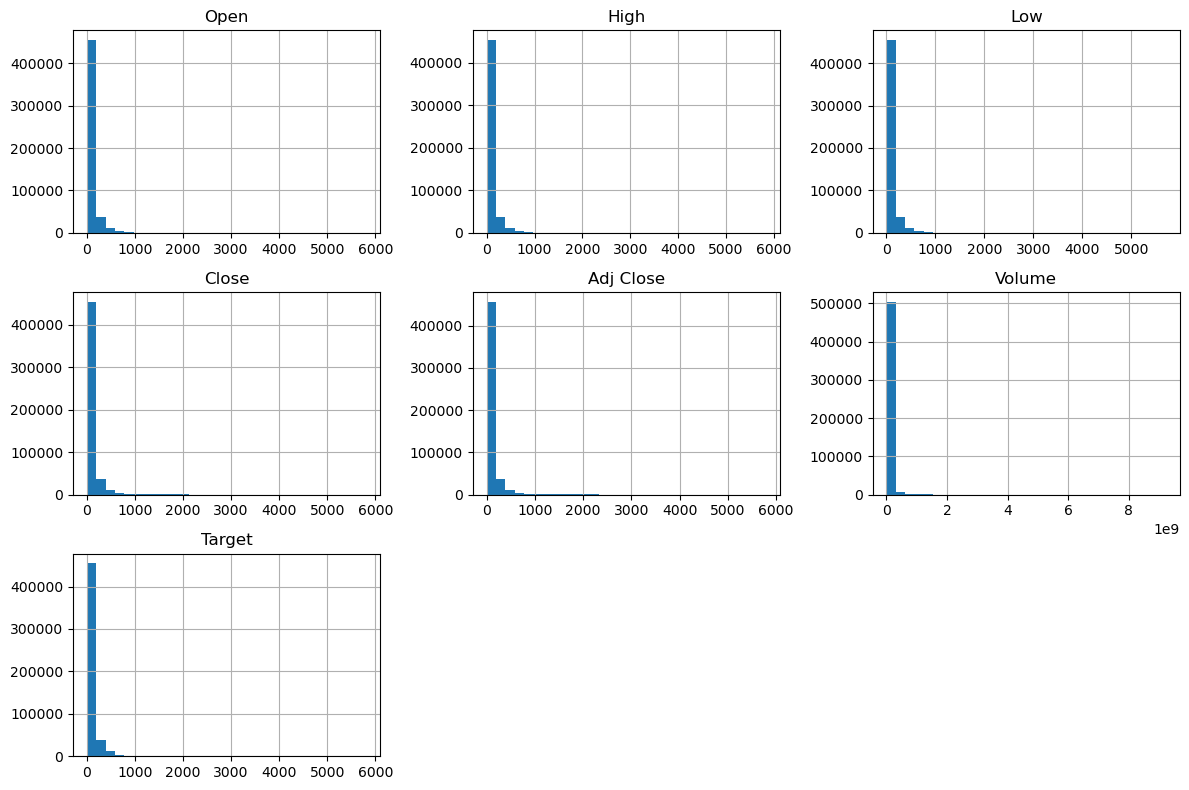

In [23]:
# Histograma de cada variable numérica
import matplotlib.pyplot as plt

df_num.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

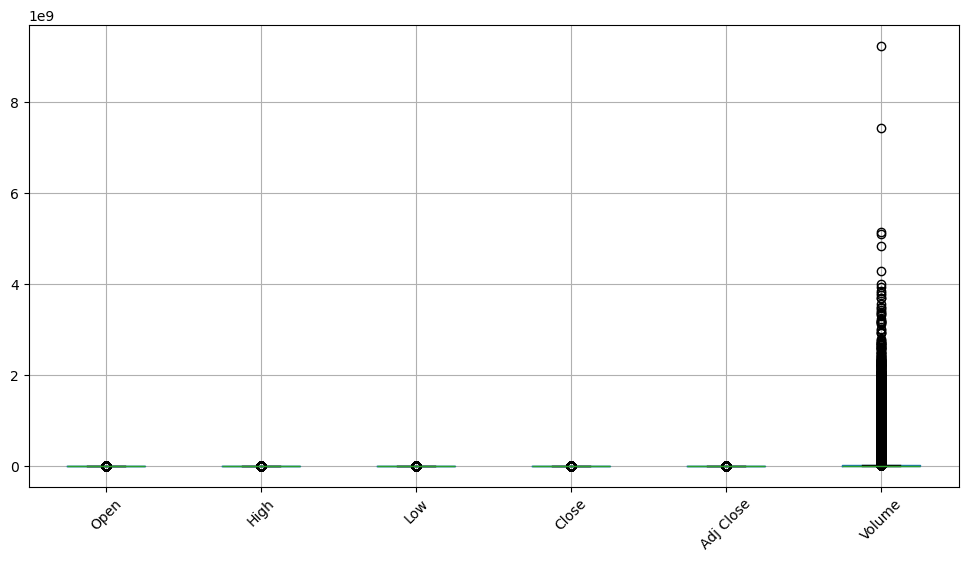

In [24]:
# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))
df_num[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].boxplot()
plt.xticks(rotation=45)
plt.show()

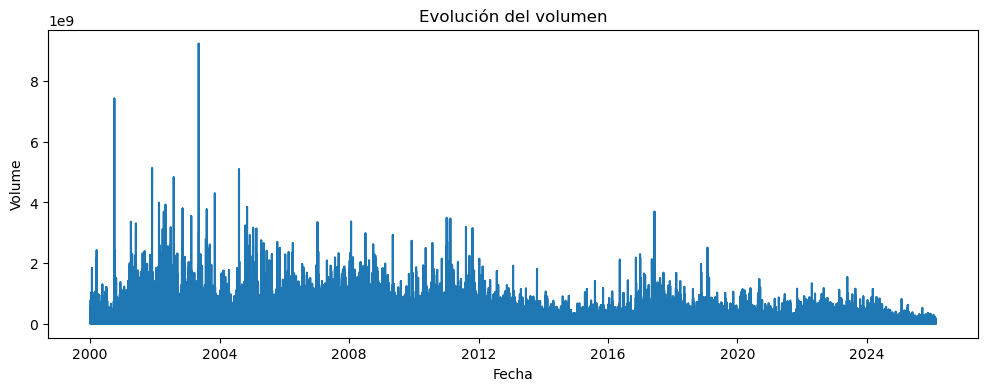

In [26]:
# Distribución temporal del volumen
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df_num["Volume"])
plt.title("Evolución del volumen")
plt.xlabel("Fecha")
plt.ylabel("Volume")
plt.show()

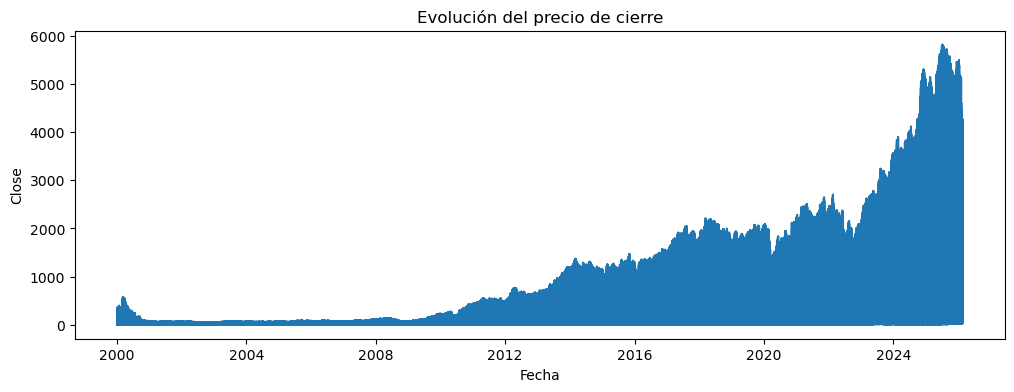

In [19]:
# Distribución temporal del precio de cierre
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Close"])
plt.title("Evolución del precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.show()

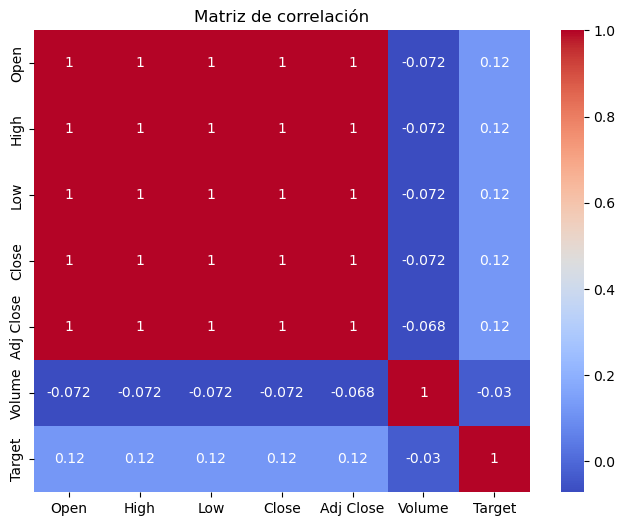

In [27]:
# Correlación entre variables numéricas
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

### 8. Análisis bivariante

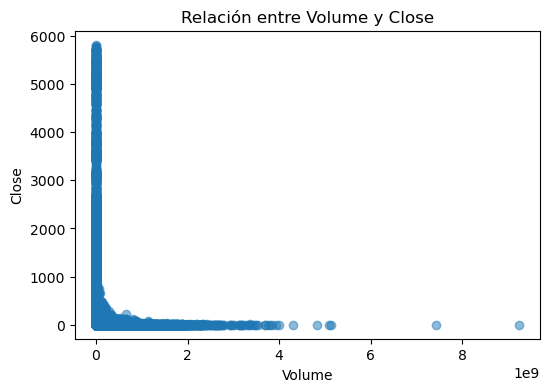

In [28]:

# Relación entre Close y Volume
plt.figure(figsize=(6, 4))
plt.scatter(df["Volume"], df["Close"], alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Close")
plt.title("Relación entre Volume y Close")
plt.show()

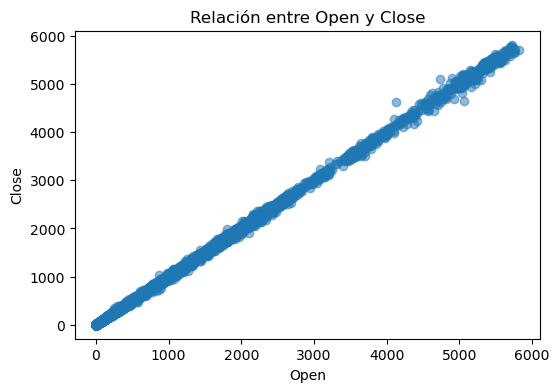

In [29]:
# Relación entre Open y Close
plt.figure(figsize=(6, 4))
plt.scatter(df["Open"], df["Close"], alpha=0.5)
plt.xlabel("Open")
plt.ylabel("Close")
plt.title("Relación entre Open y Close")
plt.show()

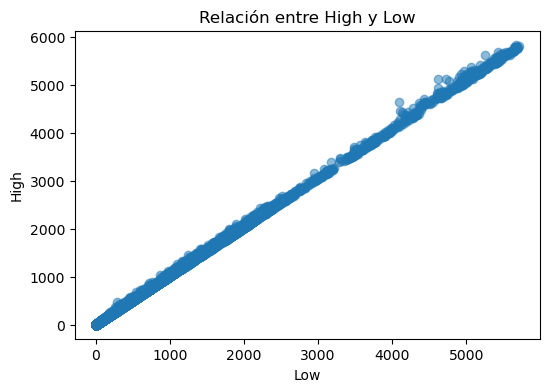

In [30]:
# Relación entre High y Low
plt.figure(figsize=(6, 4))
plt.scatter(df["Low"], df["High"], alpha=0.5)
plt.xlabel("Low")
plt.ylabel("High")
plt.title("Relación entre High y Low")
plt.show()

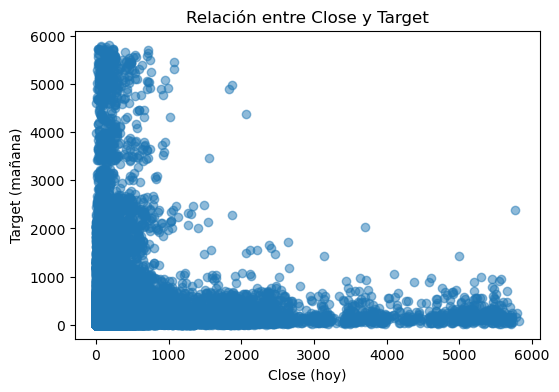

In [31]:
# Relación entre Close y Target (precio del día siguiente)
plt.figure(figsize=(6, 4))
plt.scatter(df["Close"], df["Target"], alpha=0.5)
plt.xlabel("Close (hoy)")
plt.ylabel("Target (mañana)")
plt.title("Relación entre Close y Target")
plt.show()

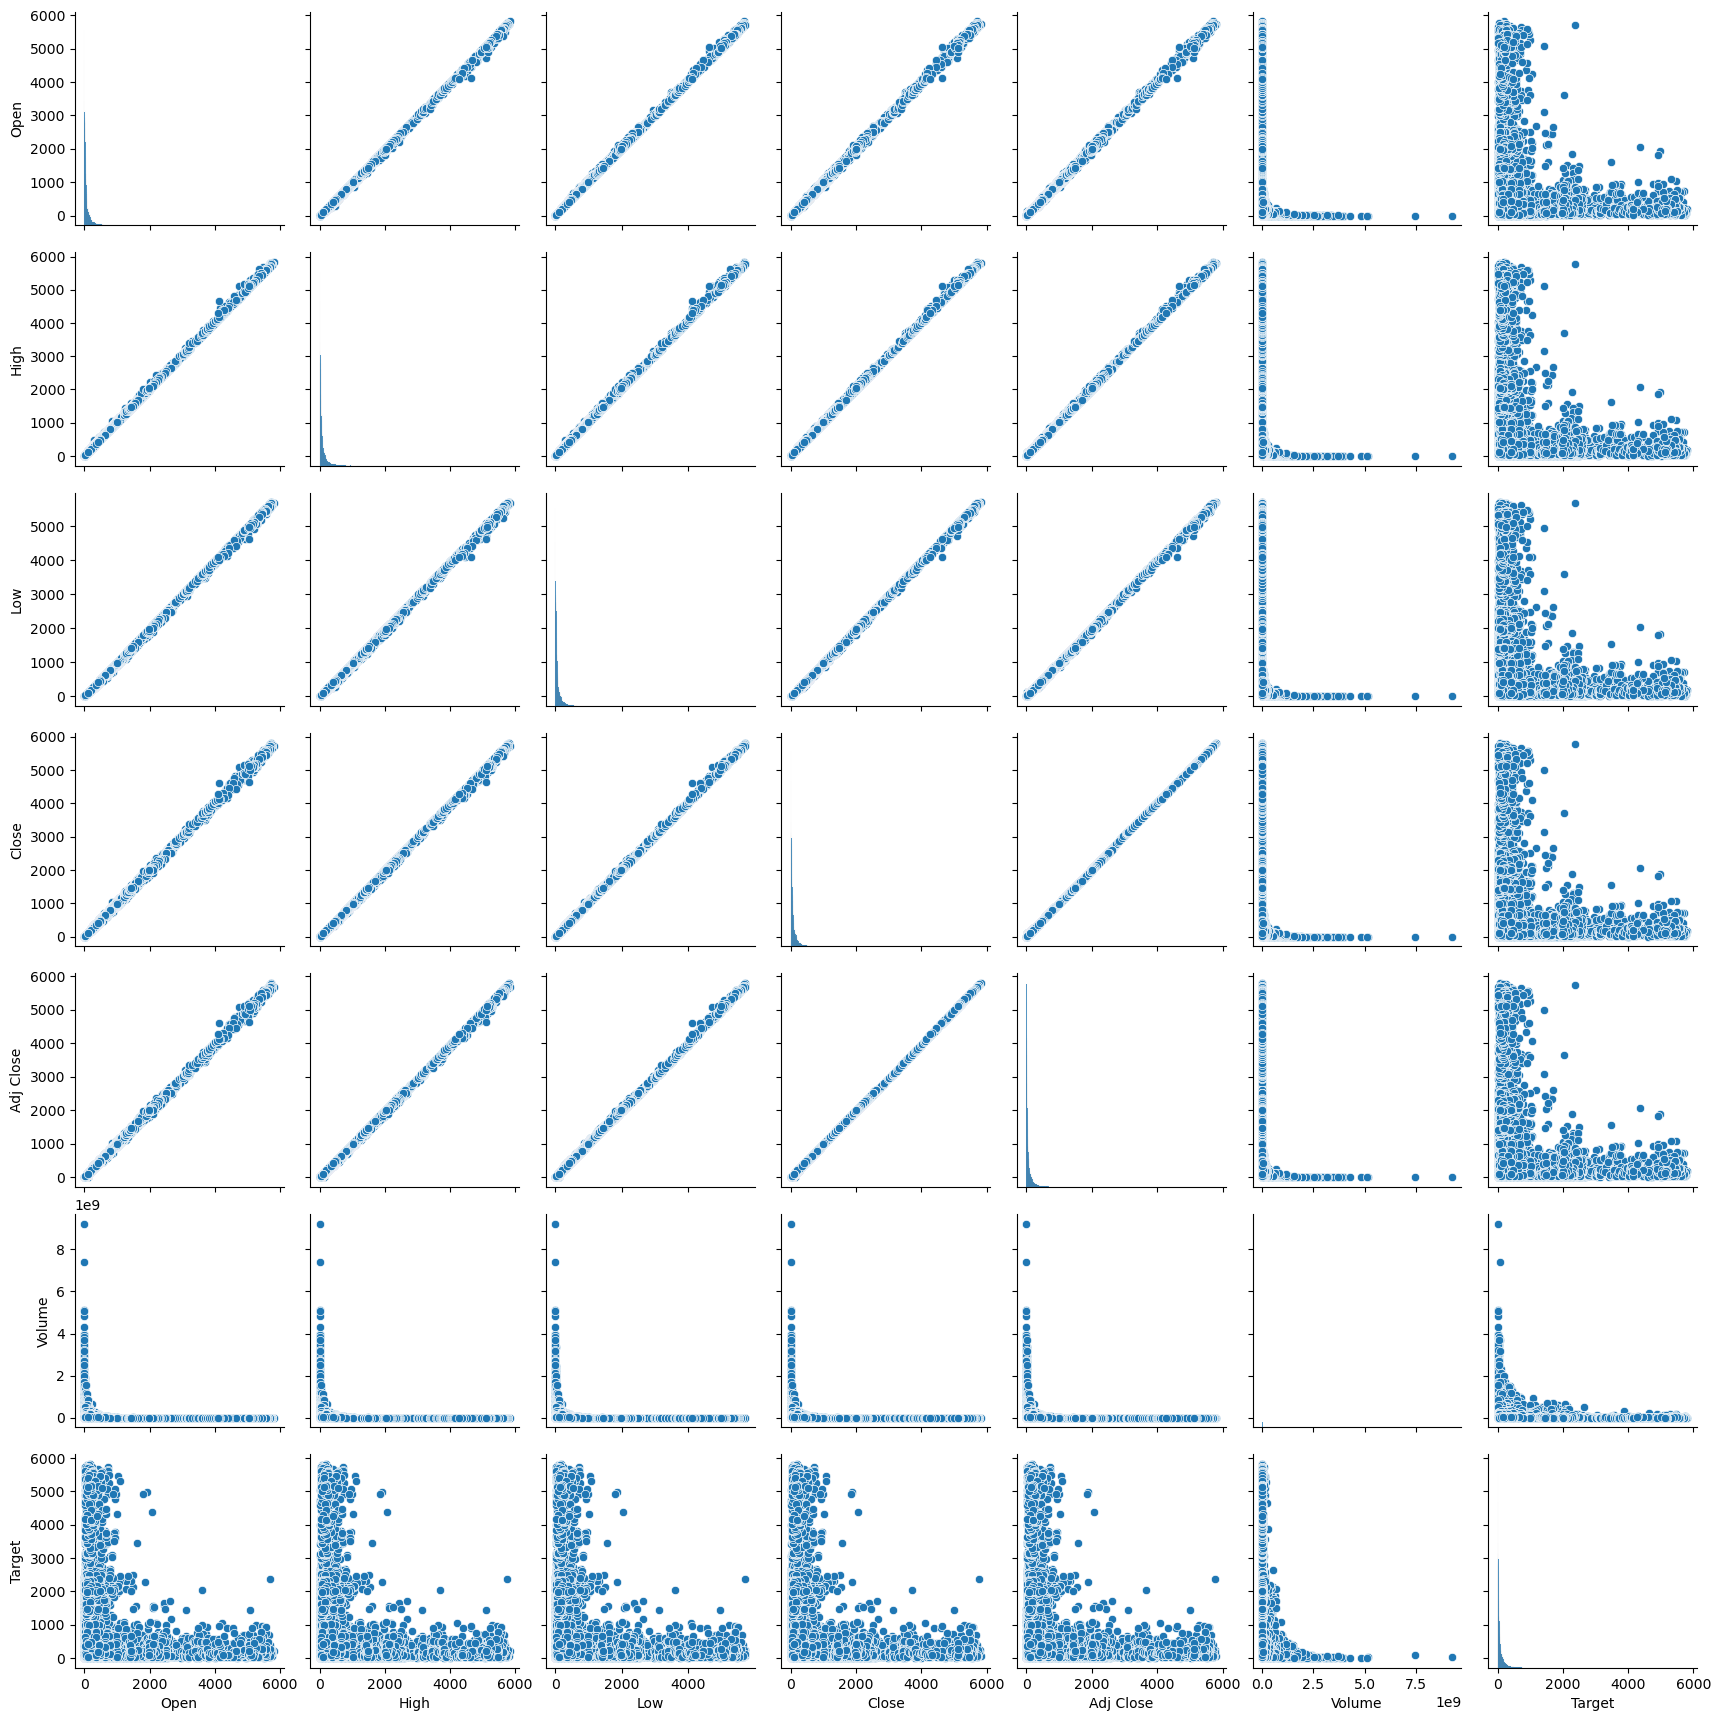

In [32]:
# Correlación par a par entre variables numéricas
sns.pairplot(df_num)
plt.show()


In [34]:
# Correlación específica entre cada variable y el Target
df_num.corr()["Target"].sort_values(ascending=False)

Target       1.000000
Adj Close    0.123592
High         0.121218
Close        0.121123
Open         0.121094
Low          0.120984
Volume      -0.030151
Name: Target, dtype: float64

In [35]:
# ver nans
df.isna().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

### 9. Eliminacion Features

In [36]:
# NaNs por columna
na_counts = df.isna().sum()
na_percent = (df.isna().mean() * 100).round(2)

na_counts, na_percent

(Ticker       0
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 Target       0
 dtype: int64,
 Ticker       0.0
 Date         0.0
 Open         0.0
 High         0.0
 Low          0.0
 Close        0.0
 Adj Close    0.0
 Volume       0.0
 Target       0.0
 dtype: float64)

### 10. Duplicados

In [37]:
# Número de filas duplicadas
df.duplicated().sum()

0

### 11. Missings

In [38]:
# Número de NaNs por columna
df.isna().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

In [39]:
df.dtypes

Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Target              float64
dtype: object

### 12. Anomalías y Errores

In [41]:
# Valores negativos en precios o volumen (no deberían existir)
(df_num < 0).sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

In [42]:
# High debe ser >= Low
df[(df["High"] < df["Low"])]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Target


In [43]:
# Close debe estar entre Low y High
df[(df["Close"] < df["Low"]) | (df["Close"] > df["High"])]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Target


### 13. Outliers

In [48]:
df["return"] = df["Close"].pct_change()
df["return"].head()

0              NaN
356203   -0.900000
366681    3.900000
60441     8.122449
379740   -0.838926
Name: return, dtype: float64

In [49]:
import numpy as np

Q1 = df["return"].quantile(0.25)
Q3 = df["return"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 3 * IQR
upper = Q3 + 3 * IQR

outliers_returns = df[(df["return"] < lower) | (df["return"] > upper)]
outliers_returns.shape

(40855, 11)

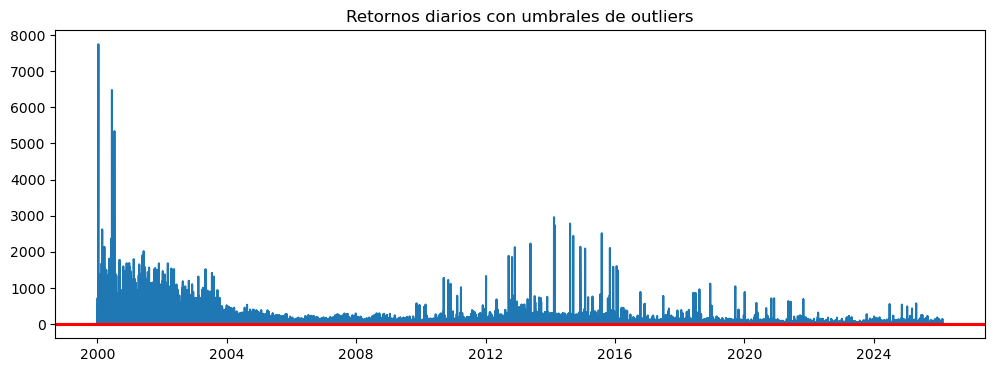

In [50]:
plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["return"])
plt.axhline(lower, color="red")
plt.axhline(upper, color="red")
plt.title("Retornos diarios con umbrales de outliers")
plt.show()

In [51]:
df["Close_diff"] = df["Close"].diff().abs()


In [52]:
threshold = df["Close_diff"].mean() + 3 * df["Close_diff"].std()

In [53]:
anomalous_rows = df[df["Close_diff"] > threshold]
anomalous_rows.shape

(8380, 11)

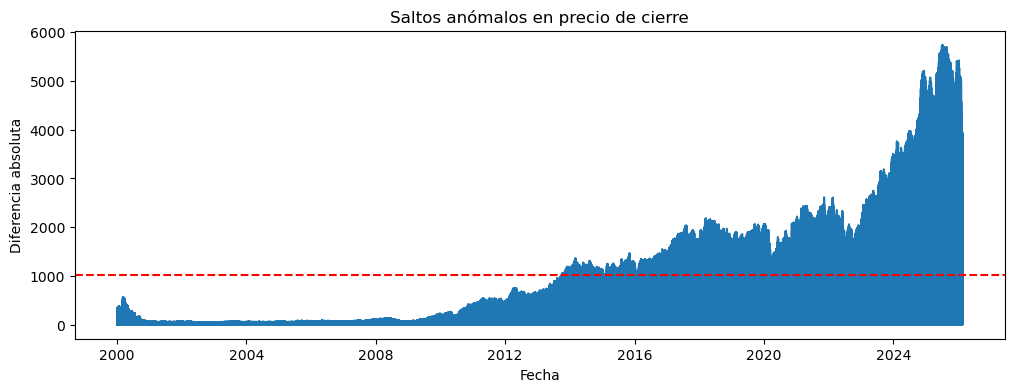

In [54]:
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Close_diff"])
plt.axhline(threshold, color="red", linestyle="--")
plt.title("Saltos anómalos en precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("Diferencia absoluta")
plt.show()

### 14. Feature engineering

In [55]:
# Retorno simple
df["return"] = df["Close"].pct_change()

# Retorno logarítmico (más estable)
import numpy as np
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

In [56]:
# Lags de precios
df["Close_lag1"] = df["Close"].shift(1)
df["Close_lag2"] = df["Close"].shift(2)
df["Close_lag3"] = df["Close"].shift(3)

# Lags de retornos
df["return_lag1"] = df["return"].shift(1)
df["return_lag2"] = df["return"].shift(2)
df["return_lag3"] = df["return"].shift(3)

In [58]:
# Medias moviles
df["SMA_5"] = df["Close"].rolling(window=5).mean()
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_20"] = df["Close"].rolling(window=20).mean()

In [59]:
#volatilidad
df["volatility_5"] = df["return"].rolling(window=5).std()
df["volatility_10"] = df["return"].rolling(window=10).std()
df["volatility_20"] = df["return"].rolling(window=20).std()

In [60]:
#Momentum
df["momentum_5"] = df["Close"] - df["Close"].shift(5)
df["momentum_10"] = df["Close"] - df["Close"].shift(10)

In [61]:
#RSI
window = 14
delta = df["Close"].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()

rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))

In [62]:
#MACD
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()

df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

In [63]:
df_fe = df.dropna().copy()
df_fe.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Target,Close_diff,...,volatility_5,volatility_10,volatility_20,momentum_5,momentum_10,RSI,EMA_12,EMA_26,MACD,MACD_signal
473142,TTWO,2000-01-03,8.92,10.00,8.67,9.12,9.12,1176750,45.09,32.12,...,4.371642,3.260198,19.273313,6.95,-80.54,47.190472,20.751163,17.516287,3.234877,4.601392
14444,ADI,2000-01-03,46.75,46.94,44.00,45.09,27.64,3655600,51.44,35.97,...,4.435180,3.320200,19.218899,36.75,13.47,56.011730,24.495600,19.558784,4.936816,4.668476
479713,TXN,2000-01-03,49.75,51.94,48.06,51.44,31.31,10815600,18.78,6.35,...,4.311281,3.275548,19.256298,48.36,39.13,55.547324,28.640892,21.920356,6.720536,5.078888
490400,VRTX,2000-01-03,17.75,18.78,16.81,18.78,18.78,1010000,56.68,32.66,...,1.932347,3.348768,19.294562,-14.00,-12.66,47.300280,27.123832,21.687737,5.436095,5.150330
68838,ASML,2000-01-03,56.98,56.98,54.42,56.68,36.53,863632,37.97,37.90,...,2.016201,3.293129,19.258625,15.44,38.90,44.852344,31.670935,24.279756,7.391178,5.598499


In [66]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514054 entries, 473142 to 470776
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         514054 non-null  object        
 1   Date           514054 non-null  datetime64[ns]
 2   Open           514054 non-null  float64       
 3   High           514054 non-null  float64       
 4   Low            514054 non-null  float64       
 5   Close          514054 non-null  float64       
 6   Adj Close      514054 non-null  float64       
 7   Volume         514054 non-null  int64         
 8   Target         514054 non-null  float64       
 9   Close_diff     514054 non-null  float64       
 10  return         514054 non-null  float64       
 11  log_return     514054 non-null  float64       
 12  Close_lag1     514054 non-null  float64       
 13  Close_lag2     514054 non-null  float64       
 14  Close_lag3     514054 non-null  float64       
 15  

### 15. Feature reduction